<a href="https://colab.research.google.com/github/arshhad45/Financial-Data-Analysis-Stock-Price-Prediction/blob/main/Copy_of_Assignment_for_DS_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#load the dataset
sentiment_df = pd.read_csv("/content/drive/MyDrive/fear_greed_index.csv")
trader_df = pd.read_csv("/content/drive/MyDrive/historical_data.csv")
sentiment_df.head(5)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trader_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-02-12


In [ ]:
#adding date colum in Historical Trader Data
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
#feature engineering
#Feature Engineering
df = pd.merge(trader_df, sentiment_df, on="date", how="inner")
df['trade_value'] = df['Execution Price'] * df['Size USD']
df['side_num'] = df['Side'].apply(lambda x: 1 if x.lower() == 'buy' else -1)
df['signed_trade'] = df['trade_value'] * df['side_num']

# Keep 'Date', drop 'date'
df = df.drop(columns=['date','date'])

trader_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-02-12


In [ ]:
sentiment_df.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trader_df.shape


(211224, 18)

In [ ]:
sentiment_df.shape

(2644, 4)

In [ ]:
print("shape of the data",df.shape)
df.head(5)

shape of the data (211218, 23)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,trade_value,side_num,signed_trade
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1733117400,80,Extreme Greed,62795.433104,1,62795.433104
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1733117400,80,Extreme Greed,1018.886400,1,1018.886400
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1733117400,80,Extreme Greed,9188.355865,1,9188.355865
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1733117400,80,Extreme Greed,9121.930296,1,9121.930296
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1733117400,80,Extreme Greed,557.260650,1,557.260650


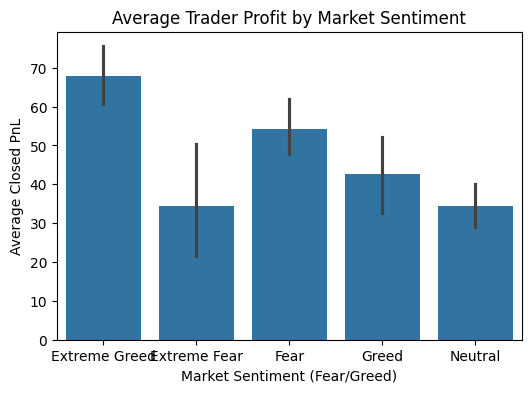

In [ ]:
#average profit
plt.figure(figsize=(6,4))
sns.barplot(x="classification", y="Closed PnL", data=df)
plt.title("Average Trader Profit by Market Sentiment")
plt.xlabel("Market Sentiment (Fear/Greed)")
plt.ylabel("Average Closed PnL")
plt.show()


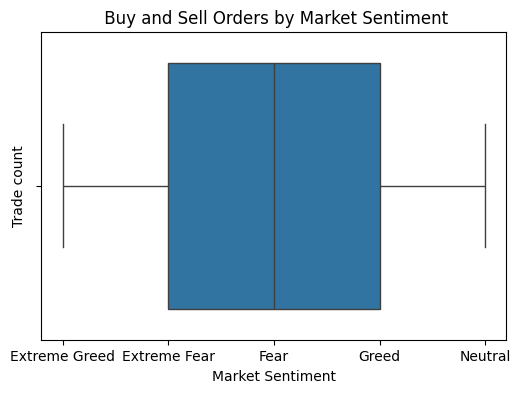

In [ ]:
#buy and sell count
plt.figure(figsize=(6,4))
sns.boxplot(x="classification", data=df)
plt.title(" Buy and Sell Orders by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade count")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


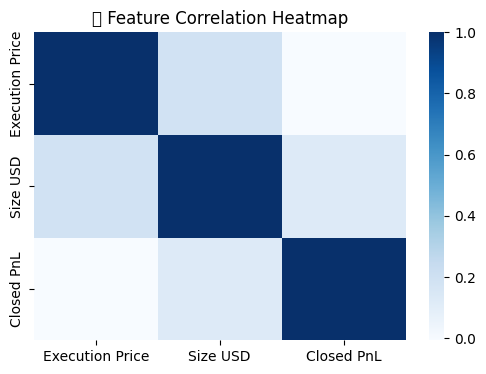

In [ ]:
#correlation heatmap
numeric_cols = ['Execution Price', 'Size USD', 'Closed PnL']
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(),cmap="Blues")
plt.title("📊 Feature Correlation Heatmap")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


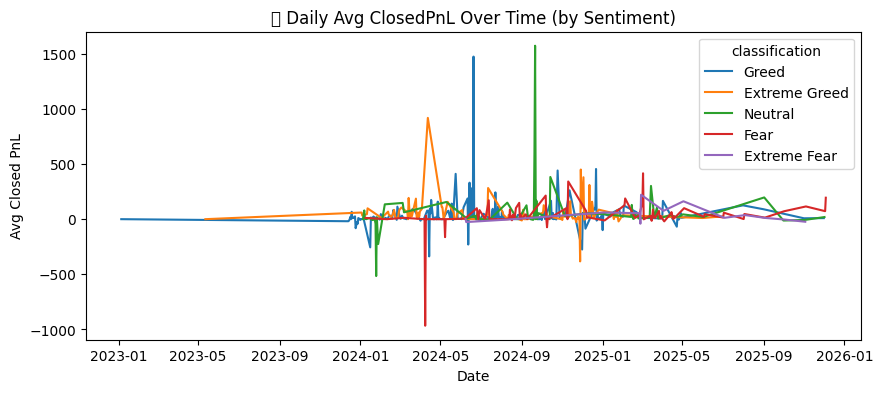

In [ ]:
#daily pnl trend over time
daily_pnl = df.groupby(['Date', 'classification'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(x="Date", y="Closed PnL", hue="classification", data=daily_pnl)
plt.title("Daily Avg ClosedPnL Over Time (by Sentiment)")
plt.xlabel("Date")
plt.ylabel("Avg Closed PnL")
plt.show()
